## Nama : Ashadi Permana
## NIM : 2209106033
## Kelas Praktikum : A22

### Untuk Mengimport Library Pandas dan di deklarasikan ke pd

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Untuk Meng Read File CSV

In [209]:
dfAnime = pd.read_csv("Animes.csv")


In [210]:
dfAnime.head()

,position,title,episodes,release_date,members,score,details,broadcast,studios,source,genres,themes,demographic,popularity
0,1.0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Sundays at 17:00 (JST),Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022 - Jun 2022,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,Saturdays at 00:00 (JST),A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242
2,3.0,Bleach: Sennen Kessen-hen,TV (? eps),Oct 2022 -,278650,9.08,https://myanimelist.net/anime/41467/Bleach__Se...,Tuesdays at 00:00 (JST),Pierrot,Manga,"Action, Adventure, Fantasy",NaN,Shounen,748
3,4.0,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Wednesdays at 18:00 (JST),Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337
4,5.0,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,Wednesdays at 02:05 (JST),White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",NaN,13


### MELIHAT INFO DARI DATASET

In [211]:
dfAnime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23070 entries, 0 to 23069
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   position      21150 non-null  float64
 1   title         23070 non-null  object 
 2   episodes      23070 non-null  object 
 3   release_date  23070 non-null  object 
 4   members       23070 non-null  int64  
 5   score         23070 non-null  float64
 6   details       23070 non-null  object 
 7   broadcast     7238 non-null   object 
 8   studios       23070 non-null  object 
 9   source        23070 non-null  object 
 10  genres        10609 non-null  object 
 11  themes        12543 non-null  object 
 12  demographic   9054 non-null   object 
 13  popularity    23070 non-null  int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 2.5+ MB


### Fungsi train_test_split dari pustaka scikit-learn (sklearn) digunakan untuk membagi dataset menjadi dua subset yang berbeda

### MELAKUKAN DATA PRE PROCESSING TERLEBIH DAHULU

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

### MENANGANI NILAI NULL

In [213]:
dfAnime["position"].fillna(dfAnime["position"].mean(), inplace= True)
dfAnime["members"].fillna(dfAnime["members"].median(), inplace= True)
dfAnime["demographic"].fillna(dfAnime["demographic"].mode()[0], inplace= True)
dfAnime["broadcast"].fillna(dfAnime["broadcast"].mode()[0], inplace= True)
dfAnime["genres"].fillna(dfAnime["genres"].mode()[0], inplace= True)
dfAnime["themes"].fillna(dfAnime["themes"].mode()[0], inplace= True)
dfAnime.isna().sum()

position        0
title           0
episodes        0
release_date    0
members         0
score           0
details         0
broadcast       0
studios         0
source          0
genres          0
themes          0
demographic     0
popularity      0
dtype: int64

### mengecek nilai duplikat

In [214]:
print("total nilai duplikat : ")
dfAnime.duplicated().sum()

total nilai duplikat : 


0

### MENGHILANGKAN OUTLIER

In [215]:
from scipy import stats
import numpy as np

df = dfAnime[(np.abs(stats.zscore(dfAnime.select_dtypes(['int64' , 'float64']))) <3).all(axis=1)]

In [216]:
dfAnime.select_dtypes(['int64' , 'float64']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23070 entries, 0 to 23069
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   position    23070 non-null  float64
 1   members     23070 non-null  int64  
 2   score       23070 non-null  float64
 3   popularity  23070 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 721.1 KB


In [217]:
dfAnime.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23070 entries, 0 to 23069
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         23070 non-null  object
 1   episodes      23070 non-null  object
 2   release_date  23070 non-null  object
 3   details       23070 non-null  object
 4   broadcast     23070 non-null  object
 5   studios       23070 non-null  object
 6   source        23070 non-null  object
 7   genres        23070 non-null  object
 8   themes        23070 non-null  object
 9   demographic   23070 non-null  object
dtypes: object(10)
memory usage: 1.8+ MB


In [218]:
dfAnime.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23070 entries, 0 to 23069
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         23070 non-null  object
 1   episodes      23070 non-null  object
 2   release_date  23070 non-null  object
 3   details       23070 non-null  object
 4   broadcast     23070 non-null  object
 5   studios       23070 non-null  object
 6   source        23070 non-null  object
 7   genres        23070 non-null  object
 8   themes        23070 non-null  object
 9   demographic   23070 non-null  object
dtypes: object(10)
memory usage: 1.8+ MB


In [219]:
dfAnime.head()

,position,title,episodes,release_date,members,score,details,broadcast,studios,source,genres,themes,demographic,popularity
0,1.0,Fullmetal Alchemist: Brotherhood,TV (64 eps),Apr 2009 - Jul 2010,3018336,9.12,https://myanimelist.net/anime/5114/Fullmetal_A...,Sundays at 17:00 (JST),Bones,Manga,"Action, Adventure, Drama, Fantasy",Military,Shounen,3
1,2.0,Kaguya-sama wa Kokurasetai: Ultra Romantic,TV (13 eps),Apr 2022 - Jun 2022,687194,9.10,https://myanimelist.net/anime/43608/Kaguya-sam...,Saturdays at 00:00 (JST),A-1 Pictures,Manga,"Comedy, Romance","Psychological, School",Seinen,242
2,3.0,Bleach: Sennen Kessen-hen,TV (? eps),Oct 2022 -,278650,9.08,https://myanimelist.net/anime/41467/Bleach__Se...,Tuesdays at 00:00 (JST),Pierrot,Manga,"Action, Adventure, Fantasy",Music,Shounen,748
3,4.0,Gintama°,TV (51 eps),Apr 2015 - Mar 2016,563143,9.08,https://myanimelist.net/anime/28977/Gintama°,Wednesdays at 18:00 (JST),Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi","Gag Humor, Historical, Parody, Samurai",Shounen,337
4,5.0,Steins;Gate,TV (24 eps),Apr 2011 - Sep 2011,2324018,9.08,https://myanimelist.net/anime/9253/Steins_Gate,Wednesdays at 02:05 (JST),White Fox,Visual,"Drama, Sci-Fi, Suspense","Psychological, Time Travel",Kids,13


# POSTTEST 6 "MEMBUAT MODEL DNN"

##### deklarasi variabel kolom

In [220]:
posisi = 'position'
member ='members'
popularity = 'popularity'
skor = 'score'

In [221]:
x = df.drop('popularity',axis=1) #feature
y = df['popularity'] #target

### MELAKUKAN TRAIN TEST SPLIT DATA

In [222]:
# Pemisahan data

X = dfAnime[[posisi , member]]
y = dfAnime[popularity]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

### MELAKUKAN STANDARISASI DAN LABEL ENCODING

In [223]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

### MENGGUNAKAN SEQUENTIAL MODEL

In [224]:

from keras import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [225]:
model = Sequential()

# input layer
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))

# hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# output layer
model.add(Dense(1, activation='linear'))

#Menggunakan teknik regularisasi seperti dropout dapat membantu mengurangi overfitting.
model.add(Dropout(0.63))

### MELAKUKAN MODEL COMPILE

In [226]:
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mae']
)

### MENGGUNAKAN FUNGSI CALLBACK

In [227]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Callback untuk menghentikan pelatihan jika val_loss tidak membaik dalam 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Callback untuk menyimpan model terbaik selama pelatihan
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=True)

# Definisikan daftar callback
callback_list = [early_stopping, model_checkpoint]

### MELATIH MODEL DENGAN MENGGUNAKAN FUNGSI CALLBACK

In [228]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=callback_list , verbose=1)

Epoch 1/100
505/505 [==============================] - 3s 4ms/step - loss: 64845608.0000 - mae: 6640.3726 - val_loss: 1159376.8750 - val_mae: 835.5530
Epoch 2/100
505/505 [==============================] - 2s 3ms/step - loss: 51237572.0000 - mae: 5447.0596 - val_loss: 1101957.8750 - val_mae: 805.7780
Epoch 3/100
505/505 [==============================] - 2s 3ms/step - loss: 51248620.0000 - mae: 5435.0654 - val_loss: 1097013.8750 - val_mae: 798.9957
Epoch 4/100
505/505 [==============================] - 2s 3ms/step - loss: 50906308.0000 - mae: 5403.9316 - val_loss: 1103589.7500 - val_mae: 799.8148
Epoch 5/100
505/505 [==============================] - 2s 3ms/step - loss: 50682500.0000 - mae: 5374.0146 - val_loss: 1114350.7500 - val_mae: 804.0464
Epoch 6/100
505/505 [==============================] - 2s 3ms/step - loss: 50969104.0000 - mae: 5398.8403 - val_loss: 1098800.1250 - val_mae: 795.1065
Epoch 7/100
505/505 [==============================] - 2s 3ms/step - loss: 50334704.0000 - mae

### MELAKUKAN EVALUASI MODEL DENGAN R2 SCORE

In [229]:
from sklearn.metrics import r2_score

In [230]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

217/217 [==============================] - 0s 2ms/step
R2 Score: 0.8562884321516109


## PLOT MAE (MEAN ABSOLUTE ERROR)

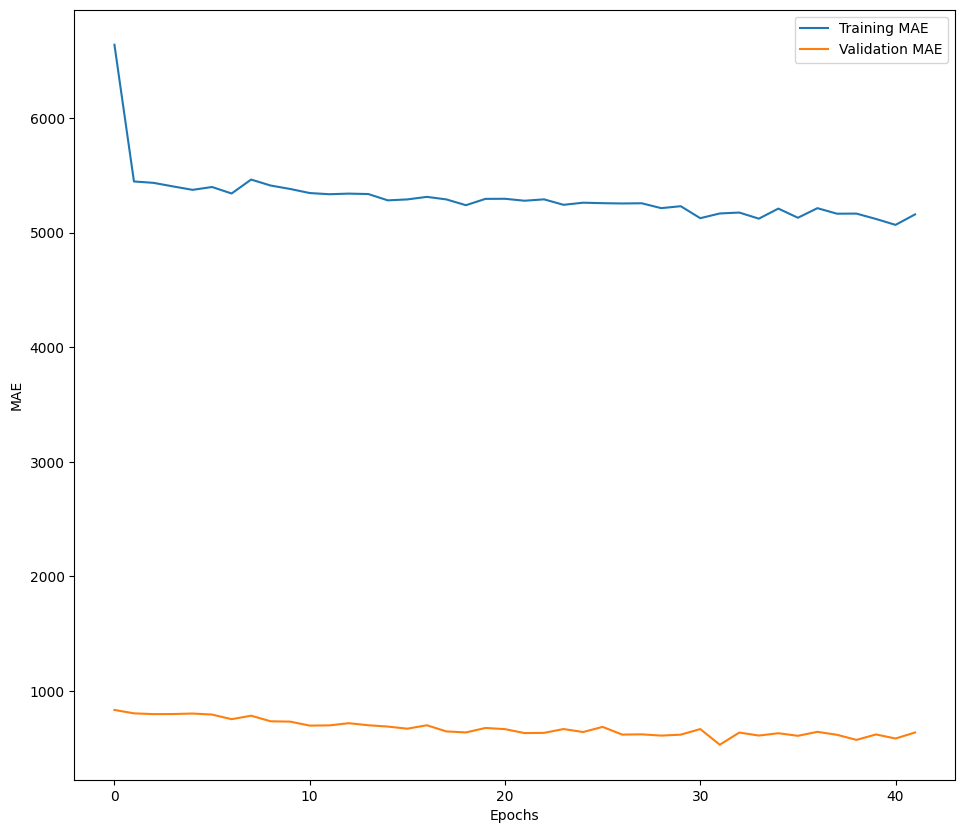

In [239]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## PLOT LOSS

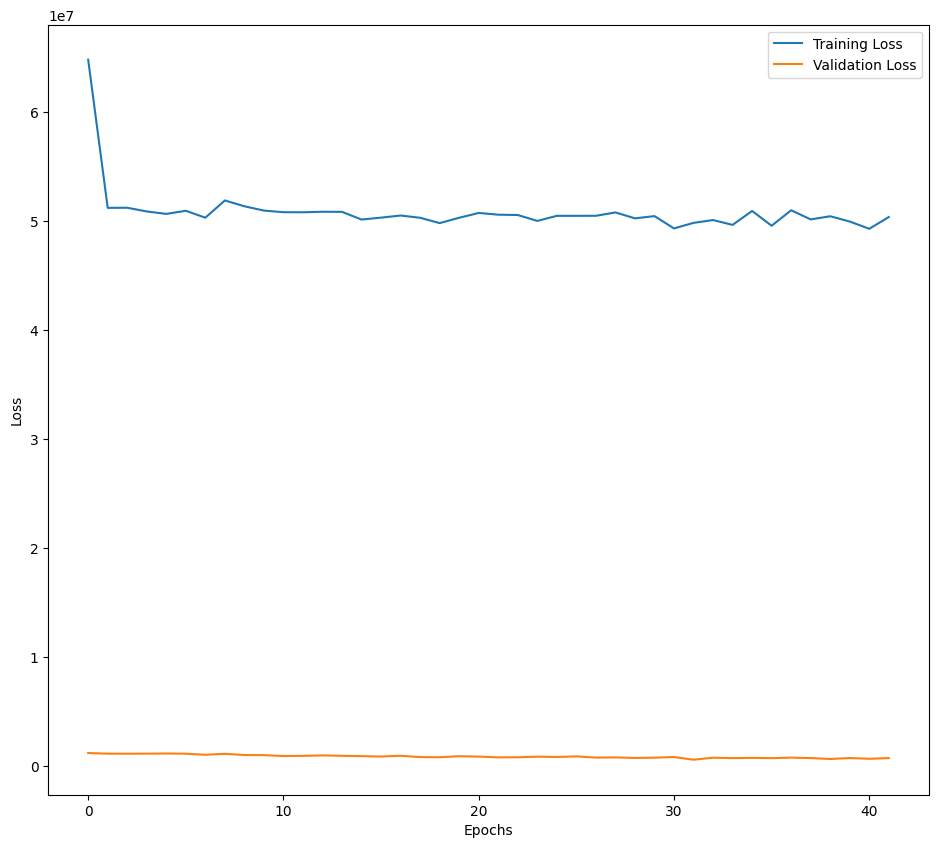

In [240]:
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()